## **Importing Libraries**

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [225]:
data=pd.read_csv('/content/world.csv')

## **Overview of the dataset**

In [226]:
data

Country                               Region  ...  Industry  Service
0       Afghanistan         ASIA (EX. NEAR EAST)           ...      0,24     0,38
1           Albania   EASTERN EUROPE                       ...     0,188    0,579
2           Algeria   NORTHERN AFRICA                      ...       0,6    0,298
3    American Samoa   OCEANIA                              ...       NaN      NaN
4           Andorra   WESTERN EUROPE                       ...       NaN      NaN
..               ...                                  ...  ...       ...      ...
222       West Bank   NEAR EAST                            ...      0,28     0,63
223  Western Sahara   NORTHERN AFRICA                      ...       NaN      0,4
224           Yemen   NEAR EAST                            ...     0,472    0,393
225          Zambia   SUB-SAHARAN AFRICA                   ...      0,29    0,489
226        Zimbabwe   SUB-SAHARAN AFRICA                   ...     0,243    0,579

[227 rows x 20 columns]

In [227]:
data = pd.read_csv('/content/world.csv', decimal=',')

In [228]:
data.head()

Country                               Region  ...  Industry  Service
0     Afghanistan         ASIA (EX. NEAR EAST)           ...     0.240    0.380
1         Albania   EASTERN EUROPE                       ...     0.188    0.579
2         Algeria   NORTHERN AFRICA                      ...     0.600    0.298
3  American Samoa   OCEANIA                              ...       NaN      NaN
4         Andorra   WESTERN EUROPE                       ...       NaN      NaN

[5 rows x 20 columns]

In [229]:
data.shape

(227, 20)

In [230]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [231]:
data.drop(['Arable (%)','Other (%)' ], axis='columns', inplace=True)

In [232]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Crops (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Crops (%)                           225 non-n

Text(0.5, 1.0, 'Number of Countries by REGİON')

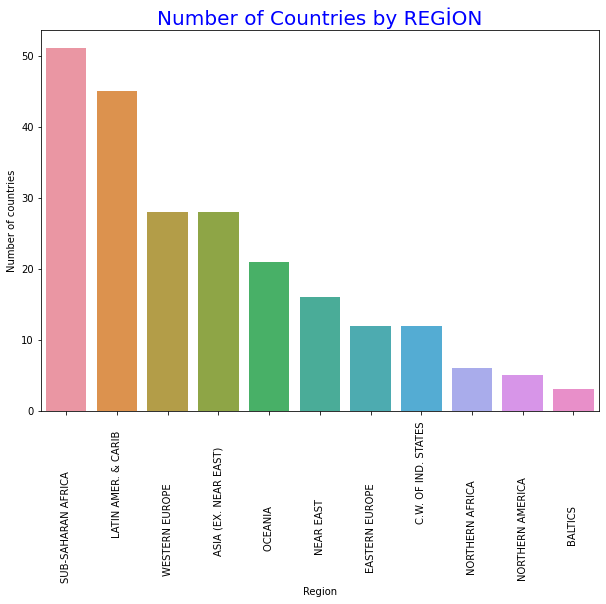

In [234]:
region = data.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=90)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by REGİON',color = 'blue',fontsize=20)

In [235]:
print(data.isnull().sum())
data.describe(include='all')

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Crops (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


Country                               Region  ...    Industry     Service
count       227                                  227  ...  211.000000  212.000000
unique      227                                   11  ...         NaN         NaN
top     Jersey   SUB-SAHARAN AFRICA                   ...         NaN         NaN
freq          1                                   51  ...         NaN         NaN
mean        NaN                                  NaN  ...    0.282711    0.565283
std         NaN                                  NaN  ...    0.138272    0.165841
min         NaN                                  NaN  ...    0.020000    0.062000
25%         NaN                                  NaN  ...    0.193000    0.429250
50%         NaN                                  NaN  ...    0.272000    0.571000
75%         NaN                                  NaN  ...    0.341000    0.678500
max         NaN                                  NaN  ...    0.906000    0.954000

[11 rows x 18 columns]

## **Data Preparation - filling the missing data**

In [236]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

In [237]:
print(data.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Crops (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [238]:
data.head(20)

Country                               Region  ...  Industry  Service
0         Afghanistan         ASIA (EX. NEAR EAST)           ...     0.240    0.380
1             Albania   EASTERN EUROPE                       ...     0.188    0.579
2             Algeria   NORTHERN AFRICA                      ...     0.600    0.298
3      American Samoa   OCEANIA                              ...     0.171    0.644
4             Andorra   WESTERN EUROPE                       ...     0.245    0.720
5              Angola   SUB-SAHARAN AFRICA                   ...     0.658    0.246
6            Anguilla               LATIN AMER. & CARIB      ...     0.180    0.780
7   Antigua & Barbuda               LATIN AMER. & CARIB      ...     0.220    0.743
8           Argentina               LATIN AMER. & CARIB      ...     0.358    0.547
9             Armenia                  C.W. OF IND. STATES   ...     0.343    0.418
10              Aruba               LATIN AMER. & CARIB      ...     0.333    0.663
11          Australia   OCEANIA                              ...     0.262    0.700
12            Austria   WESTERN EUROPE                       ...     0.304    0.678
13         Azerbaijan                  C.W. OF IND. STATES   ...     0.457    0.402
14       Bahamas, The               LATIN AMER. & CARIB      ...     0.070    0.900
15            Bahrain   NEAR EAST                            ...     0.387    0.608
16         Bangladesh         ASIA (EX. NEAR EAST)           ...     0.198    0.603
17           Barbados               LATIN AMER. & CARIB      ...     0.160    0.780
18            Belarus                  C.W. OF IND. STATES   ...     0.316    0.591
19            Belgium   WESTERN EUROPE                       ...     0.240    0.749

[20 rows x 18 columns]

## **Data Exploration**

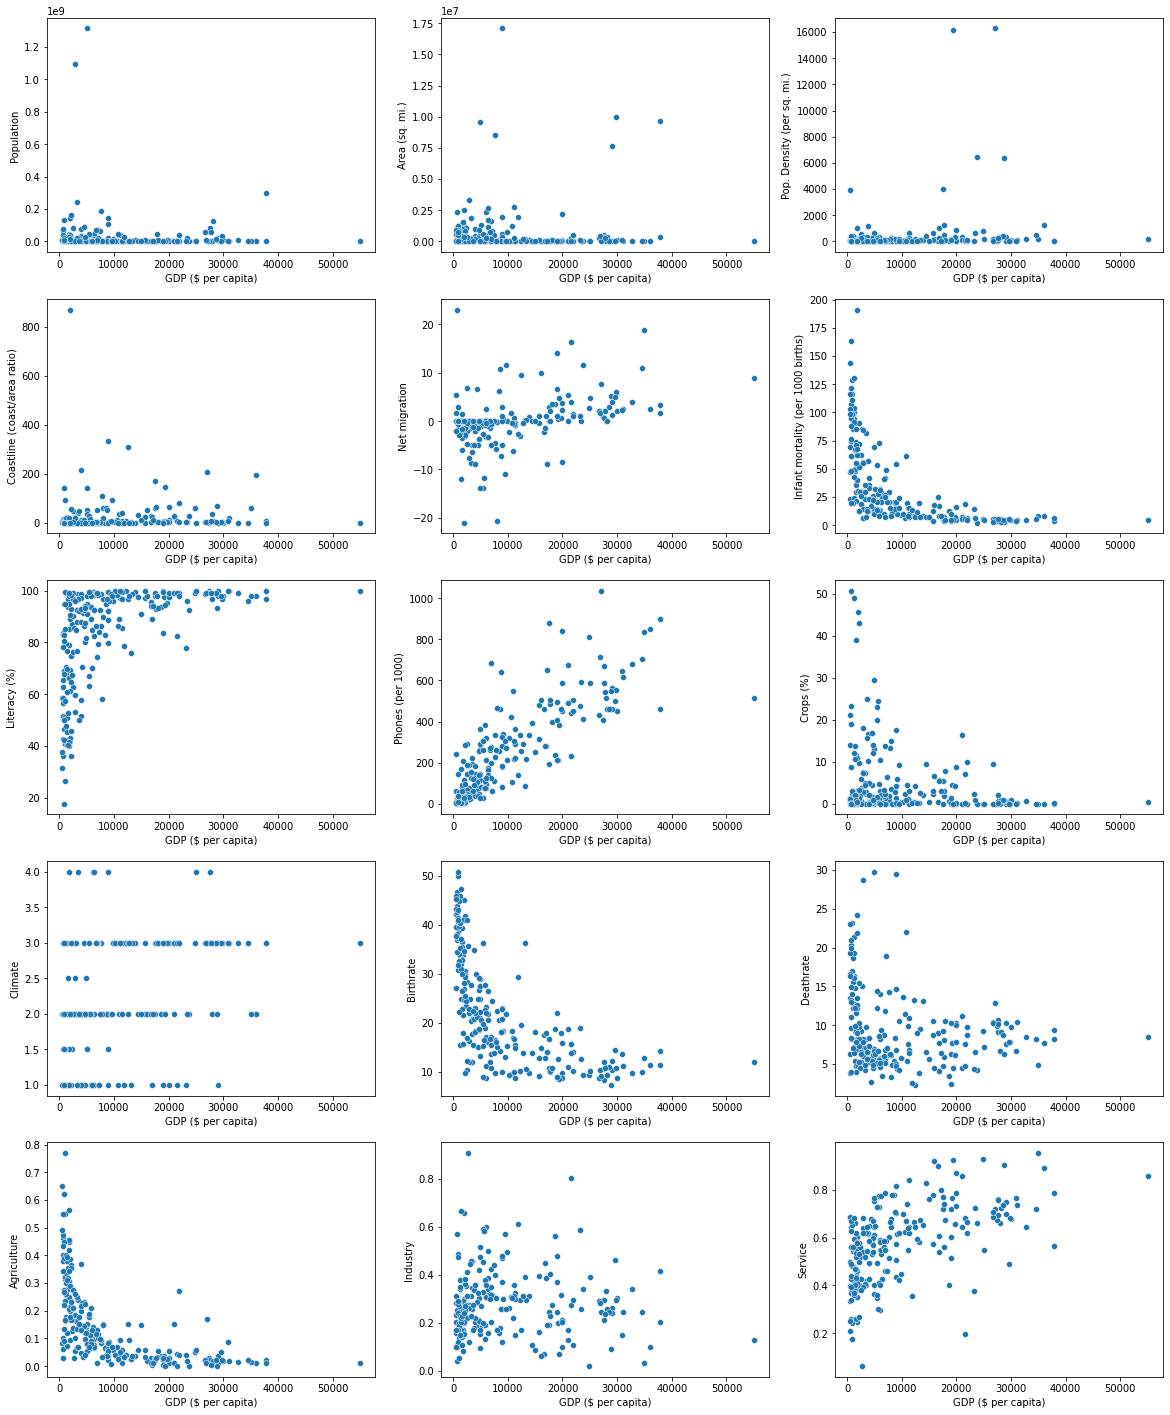

In [239]:
fig, ax = plt.subplots(5,3, figsize = (20,25))
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Population", ax = ax[0,0])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Area (sq. mi.)", ax = ax[0,1])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Pop. Density (per sq. mi.)", ax = ax[0,2])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Coastline (coast/area ratio)", ax = ax[1,0])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Net migration", ax = ax[1,1])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Infant mortality (per 1000 births)", ax = ax[1,2])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Literacy (%)", ax = ax[2,0])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Phones (per 1000)", ax = ax[2,1])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Crops (%)", ax = ax[2,2])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Climate", ax = ax[3,0])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Birthrate", ax = ax[3,1])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Deathrate", ax = ax[3,2])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Agriculture", ax = ax[4,0])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Industry", ax = ax[4,1])
sns.scatterplot(data = data, x = "GDP ($ per capita)", y = "Service", ax = ax[4,2])
plt.show()

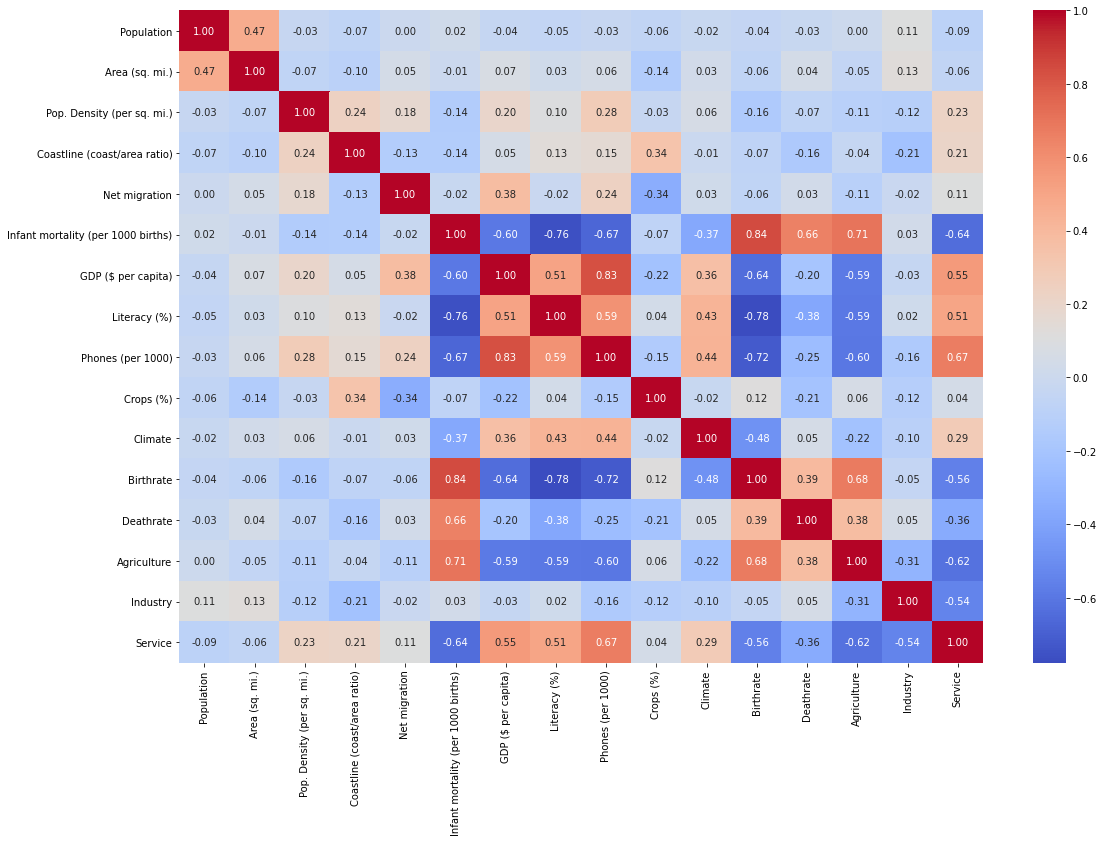

In [240]:
plt.figure(figsize=(18,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Phones (per 1000)                     0.832364
Birthrate                            -0.643199
Infant mortality (per 1000 births)   -0.595432
Agriculture                          -0.585987
Service                               0.553994
Literacy (%)                          0.508839
Net migration                         0.382029
Crops (%)                            -0.218093
Deathrate                            -0.196322
Pop. Density (per sq. mi.)            0.196063
Area (sq. mi.)                        0.072460
Coastline (coast/area ratio)          0.049561
Population                           -0.038915
Industry                             -0.034993
dtype: float64


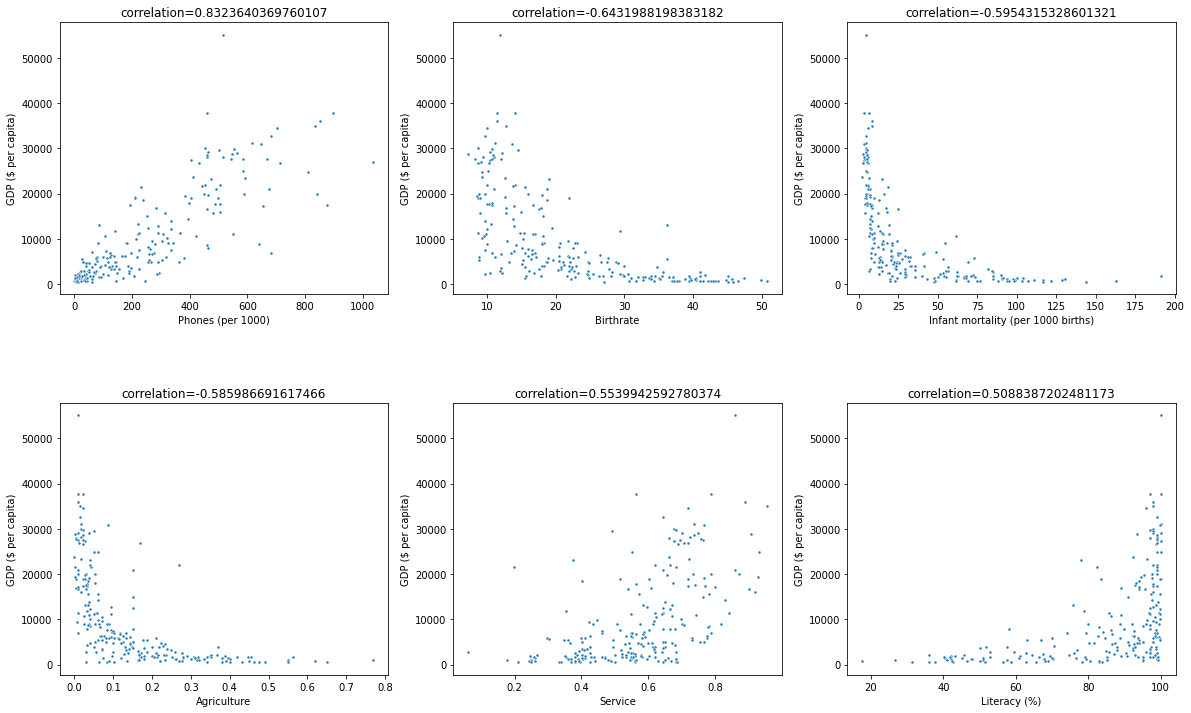

In [241]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

for i in range(2):
    for j in range(3):
        sns.scatterplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
plt.show()

## **Training and Testing**

In [242]:
#for categorical columns
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head()

Country  ... Climate_label
0     Afghanistan   ...             0
1         Albania   ...             4
2         Algeria   ...             0
3  American Samoa   ...             2
4         Andorra   ...             4

[5 rows x 20 columns]

In [243]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Crops (%)', 'Birthrate','Deathrate', 'Service', 'Agriculture','Region_label', 'Climate_label']
target = 'GDP ($ per capita)'
train, test = train_test_split(data, test_size=0.3, shuffle=True)
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [244]:
model = RandomForestRegressor(n_estimators = 100,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X) 

print('Training Score :',model.score(train_X,train_Y)*100)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

Training Score : 88.2897570215766
rmse_train: 3275.5831500735703 msle_train: 0.17881881292083565
rmse_test: 4177.235556485334 msle_test: 0.26992795005067977


In [245]:
data['Total_GDP']=data['GDP ($ per capita)'] * data['Population']  #GDP per capita = Total GDP/population
top_gdp_countries=data.sort_values('Total_GDP', ascending=False).head(20)

In [246]:
top_gdp_countries

Country  ...     Total_GDP
214   United States   ...  1.128119e+13
42            China   ...  6.569869e+12
103           Japan   ...  3.594474e+12
94            India   ...  3.176521e+12
76          Germany   ...  2.274855e+12
69           France   ...  1.680181e+12
213  United Kingdom   ...  1.678874e+12
101           Italy   ...  1.552165e+12
27           Brazil   ...  1.429395e+12
169          Russia   ...  1.271753e+12
36           Canada   ...  9.863482e+11
135          Mexico   ...  9.670457e+11
190           Spain   ...  8.887525e+11
110    Korea, South   ...  8.694734e+11
95        Indonesia   ...  7.854488e+11
11        Australia   ...  5.876584e+11
198          Taiwan   ...  5.390444e+11
96             Iran   ...  4.808190e+11
201        Thailand   ...  4.782738e+11
189    South Africa   ...  4.728077e+11

[20 rows x 21 columns]

Text(0, 0.5, 'Total_GDP')

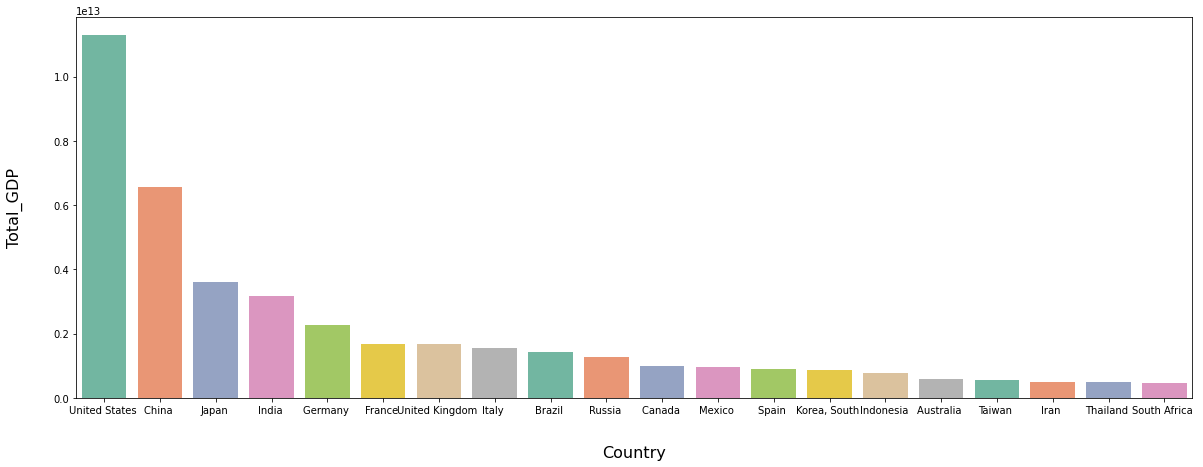

In [247]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,7))
sns.barplot(x='Country',y='Total_GDP',data=top_gdp_countries,palette='Set2')
axes.set_xlabel('Country',labelpad=30,fontsize=16)
axes.set_ylabel('Total_GDP',labelpad=30,fontsize=16)

# **Visualization of results**

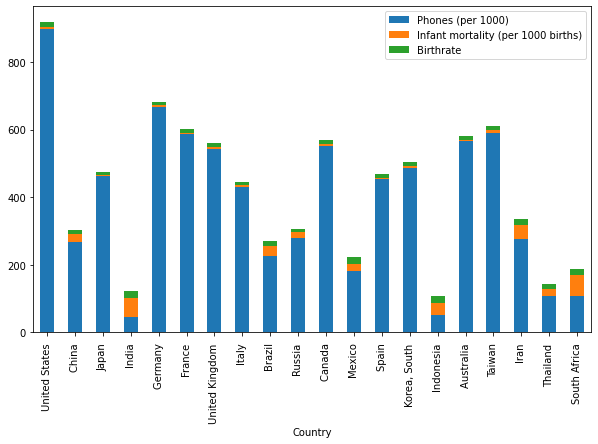

In [248]:
plot_data = top_gdp_countries[['Country','Phones (per 1000)', 'Infant mortality (per 1000 births)', 'Birthrate']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

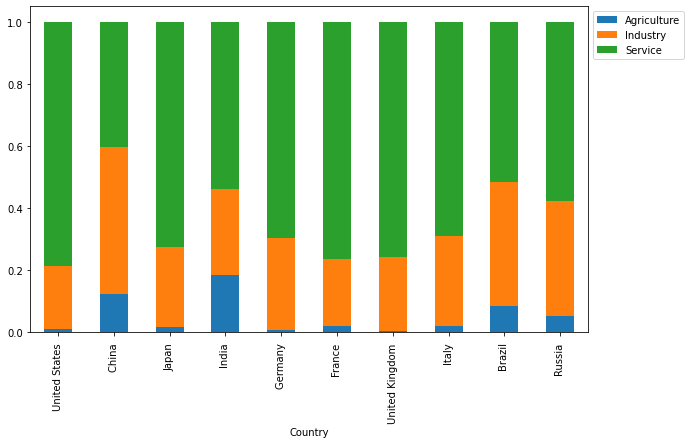

In [249]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [250]:
!pip install pywedge

In [251]:
import pywedge as pw
mc = pw.Pywedge_Charts(top_gdp_countries,c=None, y = 'GDP ($ per capita)')
charts = mc.make_charts()